# Lab9 - Build a ML Pipeline from scratch

In this lab, you will build your ML pipeline including **pre-processing** and **model training** using with [Pandas](https://pandas.pydata.org/) and [Scikit-Learn](https://scikit-learn.org/stable/) libraries.


[Pandas](https://pandas.pydata.org/) is a Python library useful for handling and analyzing data structures, particularly bidimensional tables and time series (i.e., data associated with time). It provides useful data structures (e.g., Series and DataFrames) to manage data effectively. The library provides tools for managing the data selection, transforming data with grouping and pivoting operations, managing missing data in the dataset, and performing statistics and charts on data. Pandas is based on [Numpy](https://numpy.org/) arrays.

[Scikit-Learn](https://scikit-learn.org/stable/) is a Python library that implements many machine learning algorithms, and it is built on [Numpy](https://numpy.org/), [SciPy](https://scipy.org/) and [Matplotlib](https://matplotlib.org/). In Scikit-learn both *unsupervised* (e.g., K-Means, DBScan clustering algorithms), and *supervised* algorithms for *regression* and *classification* tasks are available. Scikit-Learn also provides  useful functions for data pre-processing, feature extraction, feature selection, and dimensionality reduction.

A typical **machine learning pipeline** involves the following steps:
  1. **Data Collection**: Gather your data. - *(uncovered)*
  2. **Data Exploration**: Perform exploratory data analysis to understand patterns, distributions, and correlations in the data.
  3. **Data Splitting**: Split the dataset into training, validation (optional), and test sets.
  4. **Data Cleaning**: Handle missing values, remove duplicates, and correct errors.
  5. **Feature Selection**: Select relevant features and remove redundant ones.
  6. **Data Transformation**: Normalization, standardization, and encoding.
  7. **Feature Engineering**: Create new features or modify existing ones (e.g., discretization).
  8. **Data Augmentation**: Augment the training set to increase its size and variability (if possible). Apply techniques like oversampling, undersampling, or [SMOTE](https://medium.com/@corymaklin/synthetic-minority-over-sampling-technique-smote-7d419696b88c) to handle imbalanced data. - *(uncovered)*
  9. **Model Selection and Training**: Choose and train the model using the pre-processed training set.
  10. **Hyperparameters Tuning**: Explore various hyperparameter configurations to improve upon the baseline model's performance.  Evaluate each set of hyperparameters using a validation set or cross-validation to assess the model's performance. - *(uncovered)*
  11. **Model Evaluation**: Evaluate the model's performance on the preprocessed test set using appropriate metrics.

You can also create pre-processing pipelines that automate all the pre-processing steps.

The previous steps are just a general list. However, they depend on the model you want to train. For example, tree-based algorithms such as decision trees and random forests can handle categorical data naturally. This, they do not require the encoding of categorical features and normalization/standardization.

 Note that, it is reccomended to split the dataset early in the process and using *only* the training set for deriving any data-specific insights or transformations are fundamental practices to prevent data leakage and ensure the model's generalizability to new data. This approach maintains the test set as an unbiased assessment of the model's performance.

In [67]:
# Import the required libraries for this exercise

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


## 1. Load dataset

In this exercise, you will train machine learning models to predict diabetes in patients based on their medical history and demographic information, using the **Diabetes prediction dataset**.

The **Diabetes prediction dataset** is a collection of medical and demographic data records from patients, and their diabetes status (positive or negative).


This is an example of real-world medical application. Indeed, this model can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans.


Each record includes several features, such as:
- **Pregnancies**
- **Glucose**
- **BloodPressure**
- **SkinThickness**
- **Insulin**
- **BMI**
- **DiabetesPedigreeFunction**
- **Age**

And of course the target variable
- **Outcome**

You can find more info here: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database


In [68]:
df = pd.read_csv('data_lab9/diabetes.csv')
X= df.drop('Outcome', axis=1)
y = df['Outcome']

## 2. Data Exploration

In [4]:
X.shape,y.shape

((768, 8), (768,))

In [5]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [7]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000




<details>
<summary><strong>There is something weird about this dataset, did you notice?</strong></summary>

Can minimum value of below listed columns be zero (0)?¶

On these columns, a value of zero does not make sense and thus indicates missing value.

Following columns or variables have an invalid zero value:

- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI

It is better to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values

</details>



In [69]:
X[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = X[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.nan)
X.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

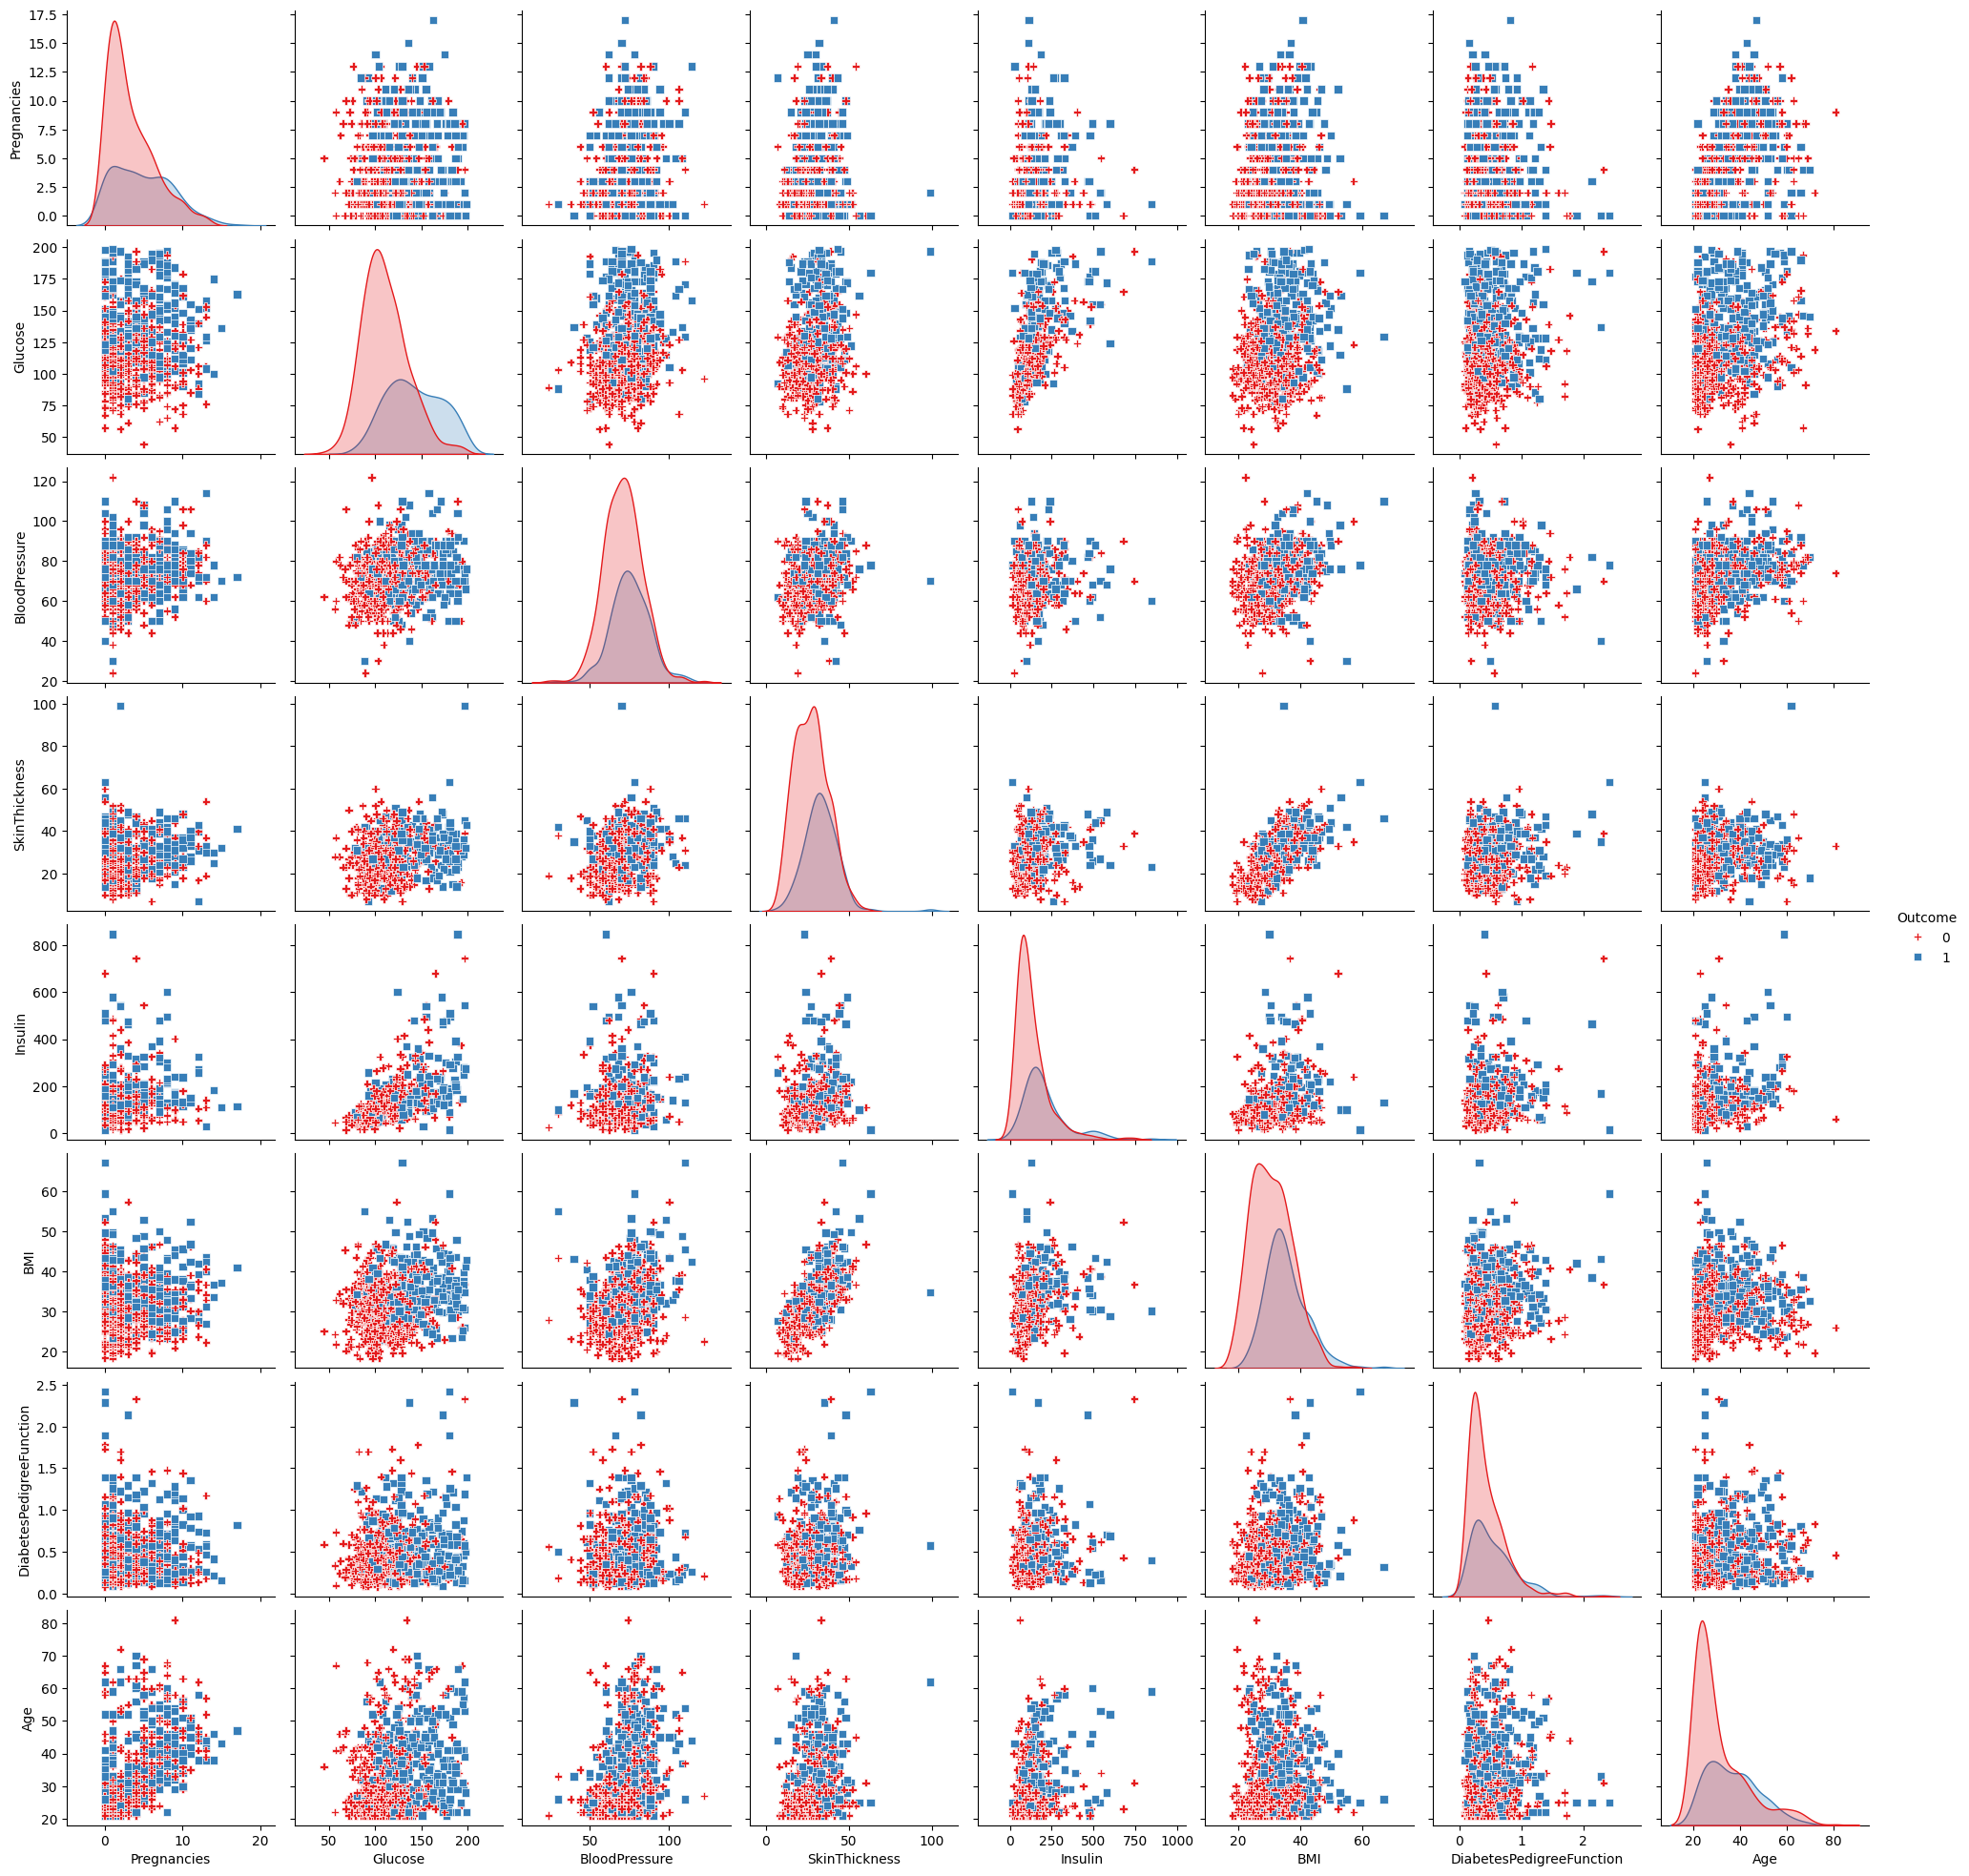

In [70]:
import seaborn as sns
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)
sns.pairplot(df, hue='Outcome', markers=["P", "s"], palette="Set1")

1. Perform the pre-processing:
  * Split into **train** and **test** sets (80% train and 20% test).
  * Handling **missing values**.
  * **Remove** useless or redundant features.
  * **Combine features** to create new features.
  * Perform **discretization** of features if necessary.
  * Encode **categorical features**.
  * Perform **normalization** or **standardization** of input features.
  * **Encode the target** variable if necessary.

<details>
<summary><strong>Hints</strong></summary>

- When performing the pre-processing steps, compute the statistics on training and transform the test data accordingly.
- All the categorical features must be properly encoded.
- The dataset is highly imbalanced. F1 score and recall are more appropriate metrics for this task.

</details>


2. Train one or more **binary classifiers** to predict the diabetes status of patiens. Use appropriate evaluation metrics to identify the best performing model. 

**!!** Remember to tune the hyperparameters


This time the exercise is **open-ended**, so it is up to you to write all the code to carry out these steps.

In [71]:
y.value_counts() 
#we notice high imbalance, so we split train and test with stratify = y to mantain those proportions in each set

Outcome
0    500
1    268
Name: count, dtype: int64

# SPLIT DATA

In [74]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True, random_state=42)

# PREPROCESSING

In [75]:
#features with NaN values
features_with_nan = []
for feature in X_train.columns:
    nan_count = X_train[feature].isnull().sum()
    if nan_count > 0:
        features_with_nan.append(feature) 
    print(f'feature {feature} has {nan_count} NaN values')
print(features_with_nan)



feature Pregnancies has 0 NaN values
feature Glucose has 4 NaN values
feature BloodPressure has 23 NaN values
feature SkinThickness has 175 NaN values
feature Insulin has 290 NaN values
feature BMI has 9 NaN values
feature DiabetesPedigreeFunction has 0 NaN values
feature Age has 0 NaN values
['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']


In [76]:
#fill NaN values
def see_nan_features(X, name):
    print(f'\n\n{name} set visualization:')
    for feature in X.columns:
        nan_count = X[feature].isnull().sum()
        print(f'feature {feature} has {nan_count} NaN values')

imputer = SimpleImputer(missing_values=np.nan, strategy='mean') #all numeric features so mean is good

X_train[features_with_nan] = imputer.fit_transform(X_train[features_with_nan])
X_test[features_with_nan] = imputer.transform(X_test[features_with_nan])

see_nan_features(X_test, 'test')
see_nan_features(X_train, 'train')
X_train



test set visualization:
feature Pregnancies has 0 NaN values
feature Glucose has 0 NaN values
feature BloodPressure has 0 NaN values
feature SkinThickness has 0 NaN values
feature Insulin has 0 NaN values
feature BMI has 0 NaN values
feature DiabetesPedigreeFunction has 0 NaN values
feature Age has 0 NaN values


train set visualization:
feature Pregnancies has 0 NaN values
feature Glucose has 0 NaN values
feature BloodPressure has 0 NaN values
feature SkinThickness has 0 NaN values
feature Insulin has 0 NaN values
feature BMI has 0 NaN values
feature DiabetesPedigreeFunction has 0 NaN values
feature Age has 0 NaN values


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
353,1,90.0,62.0,12.000000,43.00000,27.2,0.580,24
711,5,126.0,78.0,27.000000,22.00000,29.6,0.439,40
373,2,105.0,58.0,40.000000,94.00000,34.9,0.225,25
46,1,146.0,56.0,29.059226,149.07716,29.7,0.564,29
682,0,95.0,64.0,39.000000,105.00000,44.6,0.366,22
...,...,...,...,...,...,...,...,...
451,2,134.0,70.0,29.059226,149.07716,28.9,0.542,23
113,4,76.0,62.0,29.059226,149.07716,34.0,0.391,25
556,1,97.0,70.0,40.000000,149.07716,38.1,0.218,30
667,10,111.0,70.0,27.000000,149.07716,27.5,0.141,40


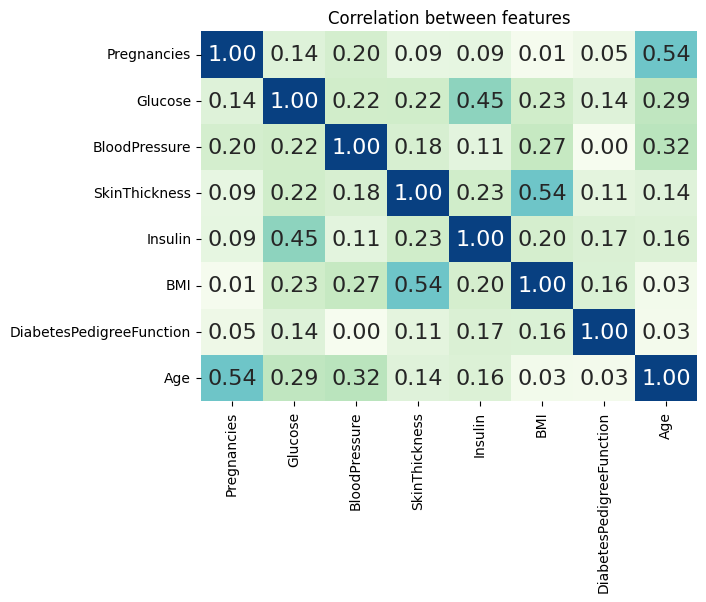

In [77]:

#!feature engineering

#remove useless or redundant features

#we analyze correlation to see what we can eliminate
corr_matrix = X_train.corr().abs()
sns.heatmap(data=corr_matrix, fmt='.2f', cbar=False, annot=True, annot_kws={'size': 16}, cmap='GnBu', vmax=1, vmin=0)
plt.title('Correlation between features')
plt.show() #we see that there are no redundant feature because all correlations are < 0.55

In [78]:
#anyway we write a snippet in which we discard all features with high correlation (keeping one for each pair obviously)

#prendiamo matrice triangolare superiore escludendo diagonale, dalla diagonale in giu restituiamo NaN (where fa questo)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)) 
single_columns = [column for column in upper.columns if any(upper[column] > 0.9)] #any IGNORA i NaN
print(f'features to drop : {single_columns}')

X_train = X_train.drop(columns=single_columns)
X_test = X_test.drop(columns=single_columns)


features to drop : []


In [79]:
#create new features from the existing ones

#insuline/glucose ratio
if 'Insulin' in X_train.columns and 'Glucose' in X_train.columns:
    X_train['Insuline/Glucose ratio'] = X_train['Insulin']/X_train['Glucose']
    X_test['Insuline/Glucose ratio'] = X_test['Insulin']/X_test['Glucose']

#we can also take all the swuared values of numerical features to underline non-linear relations
for column in X_train.columns:
    if X_train[column].dtype in ['int64', 'float64']:
        X_train[column] = X_train[column] ** 2
        X_test[column] = X_test[column] ** 2


In [ ]:
#feature extraction

#encode catgorical features (HERE IS USELESS, there are no categorical features)

#we can adopt ohe if the cardinality of the dataset is not too high
#alternatively we can adopt OrdinalEncoding if a feature has its importance only in its order (ex. age 0-14, 15-30 ecc..)
#we can also adopt LabelEncoder, similarly to ohe but when there is an ORDER implicit in the data

ohe = OneHotEncoder(sparse_output=False, dtype=int)
categorical_features = [column for column in X_train.columns if X_train[column].dtype in ['object', 'string', 'category']]
X_train_ohe = pd.DataFrame(data=ohe.fit_transform(X_train[categorical_features]).toarray(), columns=ohe.get_feature_names_out(), index=X_train.index)
X_test_ohe = pd.DataFrame(data=ohe.transform(X_test[categorical_features]).toarray(), columns=ohe.get_feature_names_out(), index = X_test.index) #utile per manteenere stessi indici,
#infatti all'inizio avevamo fatto shuffle in train test split, e qui invece crando un Dataframe gli indici sarebbero stati ordinati 0,1,2,3 ecc...

X_train.drop(columns=categorical_features, inplace=True)
X_test.drop(columns=categorical_features, inplace=True)

X_train = pd.concat([X_train, X_train_ohe], axis=1)
X_test = pd.concat([X_test, X_test_ohe], axis=1)


#for y there is no problem, it is already 0/1. Otherwise LabelEncoder is a good decision.

AttributeError: 'str' object has no attribute 'dtype'

<function matplotlib.pyplot.show(close=None, block=None)>

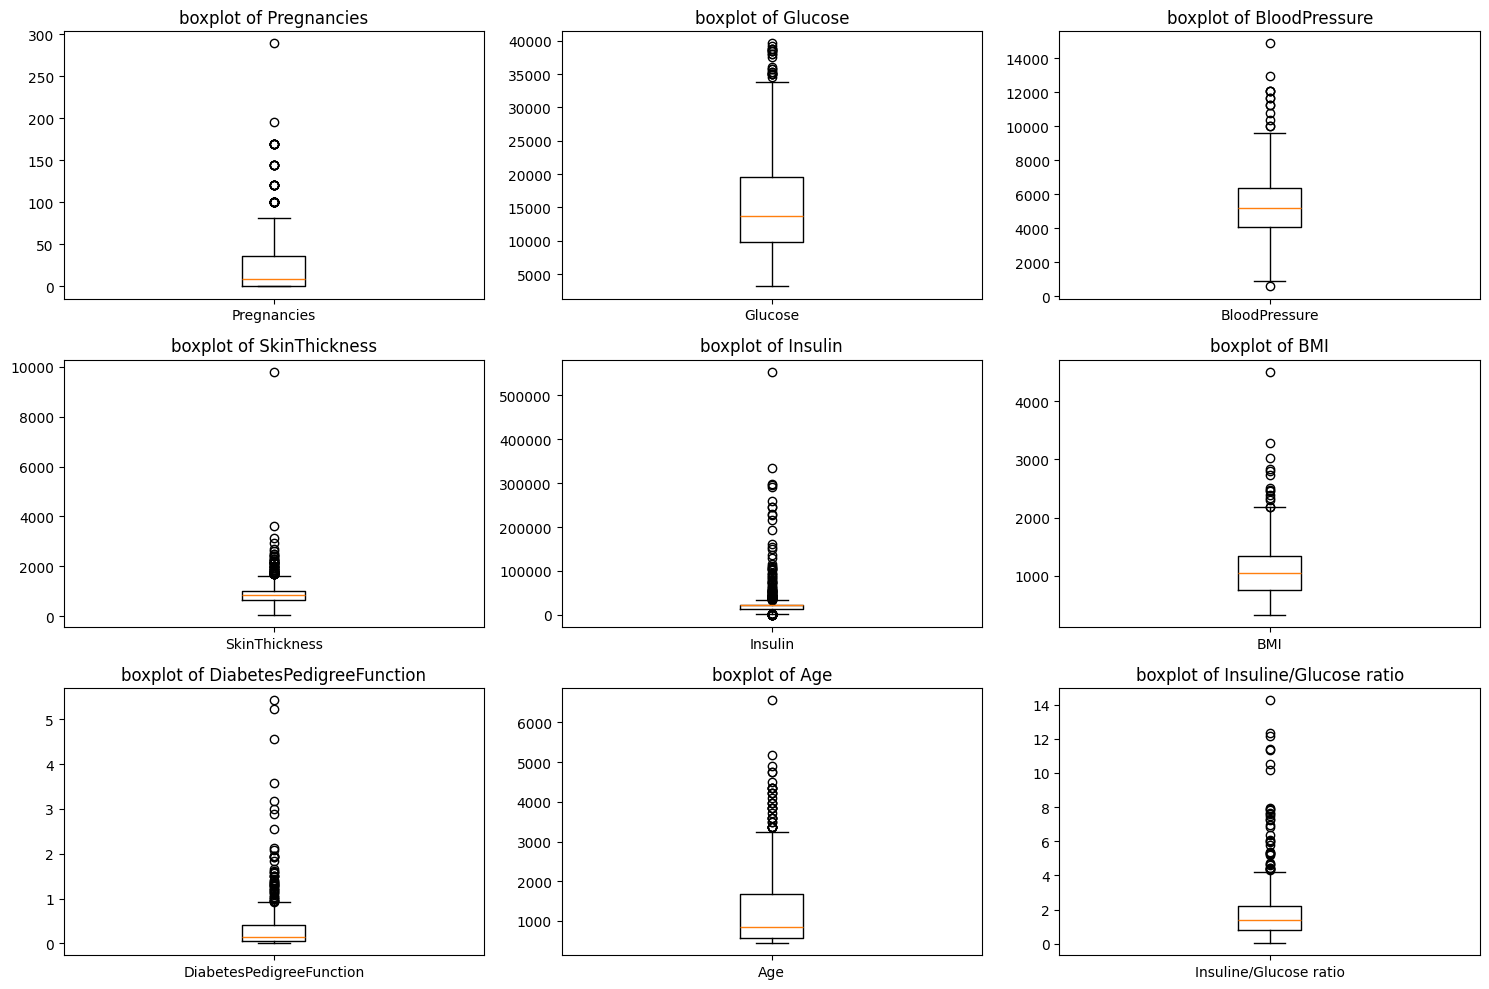

In [80]:
# Standardize features
#we can see that features in X have really different scales, so we can standardize them with a scaler

#examples are MinMaxScaler, StandardScaler, MaxAbsScaler, Normalizer, RobustScaler

#check if there are many outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(X_train.columns):
    plt.subplot(3, 3, i+1)
    plt.boxplot(X_train[column])
    plt.title(f'boxplot of {column}')
    plt.xticks([1], [column])
plt.tight_layout()
plt.show

#we see a lot of outliers --> RobustScaler

In [81]:
from sklearn.preprocessing import RobustScaler

robust = RobustScaler()
numerical_features = [column for column in X_train.columns if X_train[column].dtype in ['int64', 'float64']]

X_train_scaled = pd.DataFrame(robust.fit_transform(X_train[numerical_features]), columns = numerical_features, index=X_train.index)
X_test_scaled = pd.DataFrame(robust.transform(X_test[numerical_features]), columns = numerical_features, index=X_test.index)

X_train.drop(columns=numerical_features, inplace=True)
X_test.drop(columns=numerical_features, inplace=True)

X_train = pd.concat([X_train, X_train_scaled], axis=1)
X_test = pd.concat([X_test, X_test_scaled], axis=1)

X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Insuline/Glucose ratio
353,-0.228571,-0.570364,-0.581597,-1.755485,-2.604167,-0.544572,0.545279,-0.239819,-0.853752
711,0.457143,0.223186,0.390625,-0.289320,-2.778630,-0.305039,0.133139,0.686878,-0.997834
373,-0.142857,-0.271864,-0.789931,1.893638,-1.711145,0.295638,-0.274460,-0.195475,-0.436205
46,-0.228571,0.778345,-0.888889,0.000000,0.000000,-0.294619,0.492774,0.000000,-0.260537
682,-0.257143,-0.475967,-0.472222,1.695643,-1.431365,1.650655,-0.035427,-0.323077,-0.130133
...,...,...,...,...,...,...,...,...,...
451,-0.142857,0.435453,-0.123264,0.000000,0.000000,-0.376994,0.422978,-0.282353,-0.118415
113,0.200000,-0.807531,-0.581597,0.000000,0.000000,0.186678,0.018859,-0.195475,1.782869
556,-0.228571,-0.436779,-0.123264,1.893638,0.000000,0.706106,-0.283355,0.053394,0.700610
667,2.600000,-0.139606,-0.123264,-0.289320,0.000000,-0.515737,-0.362648,0.686878,0.293943


# TRAIN AND EVALUATE MODELS

We can start with a LogisticRegression baseline and after, we can train more complex models, even with hyperparameter tuning or feature additions to pick up the best one or teh best ones

In [82]:
#baseline with LogisticRegression with PlynomialFeatures degree = 1
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, recall_score
from sklearn.linear_model import LogisticRegression

logit1 = make_pipeline(PolynomialFeatures(degree=1, include_bias=False), LogisticRegression(penalty = None, max_iter=5000))

logit1.fit(X_train, y_train)

scores = cross_val_score(logit1, X_train, y_train, scoring='recall', cv =5, n_jobs=-1)
#0.56, not so good
print(f'the average recall for 5 iterations of cross validation in training set is: {scores.mean()}')

y_pred = logit1.predict(X_test)

auc = roc_auc_score(y_test, y_pred, average='macro')

print(f'roc auc score on test set: {auc}')


the average recall for 5 iterations of cross validation in training set is: 0.5612403100775194
roc auc score on test set: 0.66


recall after predict: 0.5


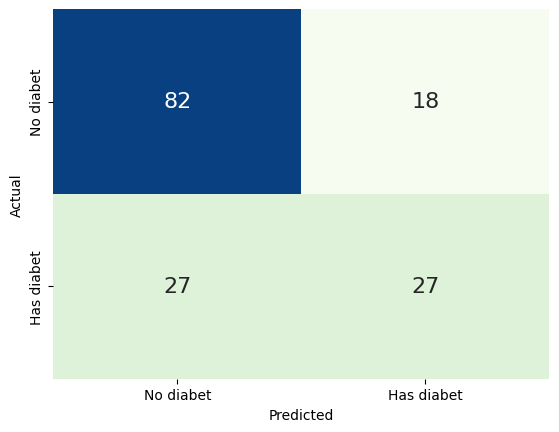

In [83]:
#now we can confusion matrix and see

from sklearn.metrics import confusion_matrix

matr = confusion_matrix(y_test, y_pred, labels=[0, 1])
print(f'recall after predict: {recall_score(y_test, y_pred)}')

sns.heatmap(data=matr, cmap='GnBu', fmt='g', annot=True, cbar=False, annot_kws={'size': 16}, xticklabels=['No diabet', 'Has diabet'], yticklabels=['No diabet', 'Has diabet'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


c:\Users\Utente\OneDrive - Politecnico di Torino\LLM_COURSE\From-0-to-LLM\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 5000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=5000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


the average recall for 5 iterations of cross validation in training set is: 0.5047619047619047
roc auc score on test set: 0.6983333333333333
recall after predict: 0.6666666666666666


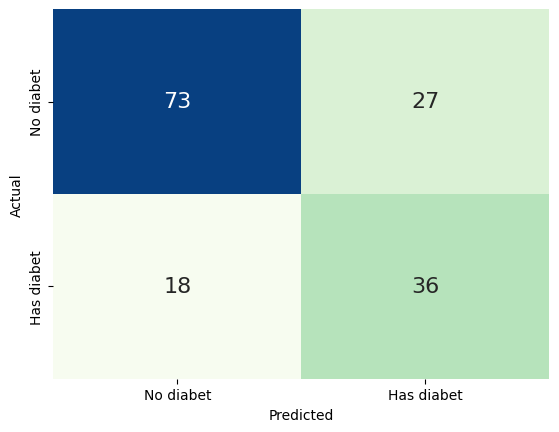

In [84]:
#now we try with degree 4


logit4 = make_pipeline(PolynomialFeatures(degree=4, include_bias=False), LogisticRegression(penalty = None, max_iter=5000))

logit4.fit(X_train, y_train)

scores = cross_val_score(logit4, X_train, y_train, scoring='recall', cv =5, n_jobs=-1)
print(f'the average recall for 5 iterations of cross validation in training set is: {scores.mean()}')

y_pred4 = logit4.predict(X_test)

auc = roc_auc_score(y_test, y_pred4, average='macro')

print(f'roc auc score on test set: {auc}')
print(f'recall after predict: {recall_score(y_test, y_pred4)}')
matr = confusion_matrix(y_test, y_pred4, labels=[0, 1])

sns.heatmap(data=matr, cmap='GnBu', fmt='g', annot=True, cbar=False, annot_kws={'size': 16}, xticklabels=['No diabet', 'Has diabet'], yticklabels=['No diabet', 'Has diabet'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#better for clinical cases in which diagnosticate a false positive is better than a false negative


c:\Users\Utente\OneDrive - Politecnico di Torino\LLM_COURSE\From-0-to-LLM\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 9303 iteration(s) (status=1):
STOP: TOTAL NO. OF F,G EVALUATIONS EXCEEDS LIMIT

You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


the average recall for 5 iterations of cross validation in training set is: 0.4579180509413067
roc auc score on test set: 0.6792592592592592
recall after predict: 0.5185185185185185


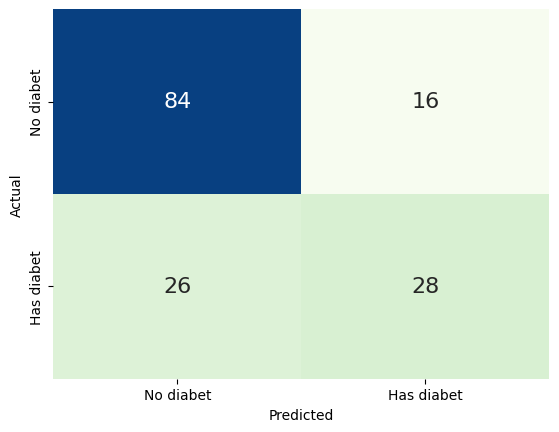

In [85]:
#now we can also regularize the logit4_ridge

logit4_ridge = make_pipeline(PolynomialFeatures(degree=4, include_bias=False), LogisticRegression(penalty = 'l2', C=0.01,max_iter=100000))

logit4_ridge.fit(X_train, y_train)

scores = cross_val_score(logit4_ridge, X_train, y_train, scoring='recall', cv =5, n_jobs=-1)
print(f'the average recall for 5 iterations of cross validation in training set is: {scores.mean()}')

y_pred4_ridge = logit4_ridge.predict(X_test)

auc = roc_auc_score(y_test, y_pred4_ridge, average='macro')

print(f'roc auc score on test set: {auc}')
print(f'recall after predict: {recall_score(y_test, y_pred4_ridge)}')
matr = confusion_matrix(y_test, y_pred4_ridge, labels=[0, 1])

sns.heatmap(data=matr, cmap='GnBu', fmt='g', annot=True, cbar=False, annot_kws={'size': 16}, xticklabels=['No diabet', 'Has diabet'], yticklabels=['No diabet', 'Has diabet'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#we improved a bit

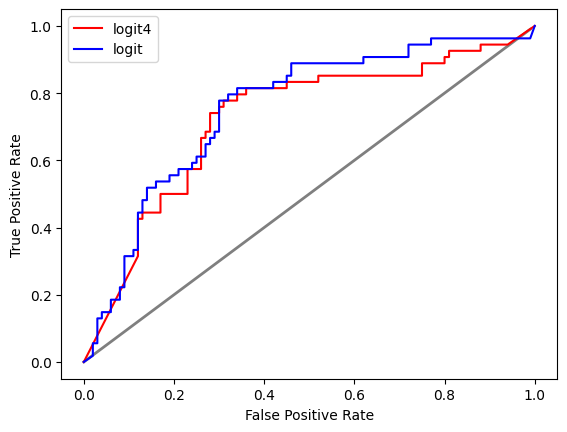

In [86]:
# we can also plot the roc to see the probability to be classified as diabetic
from sklearn import metrics
probs_ridge = logit4_ridge.predict_proba(X_test)[:, 1] #i take probabilities to be classifies as diabetic for all records
probs = logit4.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = metrics.roc_curve(y_test, probs)
fpr_ridge, tpr_ridge, thresholds_ridge = metrics.roc_curve(y_test, probs_ridge)

x = np.arange(100)/100
plt.plot(x,x, linewidth = 2, color = 'black', alpha=0.5)
plt.plot(fpr, tpr, label='logit4', color='red')
plt.plot(fpr_ridge, tpr_ridge, label='logit', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()






roc auc score on test set: 0.7546296296296297
recall after predict: 0.7592592592592593


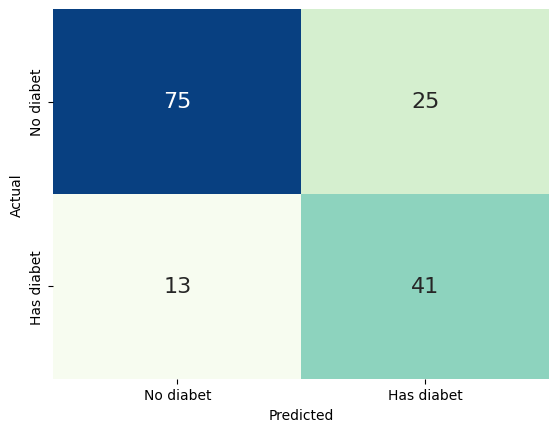

In [ ]:
#now we train a XGBoost with oversample (scale_pos_weight)
from xgboost import XGBClassifier
#scale_pos_wight = n_neg/n_pos 
n_neg = y_train.value_counts()[0]
n_pos = y_train.value_counts()[1]

param_dist = {
    'n_estimators': [400, 500], #numero alberi
    'max_depth': [3, 4, 5, 6, 8, 10], 
    'learning_rate': [0.001, 0.01, 0.05, 0.1], #step size sulla discesa del gradiente
    'gamma': [0, 0.1, 0.3, 0.5, 1], #regolarizzazione split, piu e alto e piu la decision boundary e precisa e segue meglio i dati (rischio overfitting) NON PRESENTE IN LightGBM e CatBoost
    'reg_alpha': [0, 0.01, 0.1, 1], #L1 ) NON PRESENTE IN CatBoost
    'reg_lambda': [0.1, 1, 10] #
}
model = XGBClassifier(scale_pos_weight=n_neg/n_pos)
xgb = GridSearchCV(estimator=model, param_grid=param_dist, scoring='recall_macro', cv=5, n_jobs=-1, error_score='raise')

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

auc = roc_auc_score(y_test, y_pred_xgb, average='macro')

print(f'roc auc score on test set: {auc}')
print(f'recall after predict: {recall_score(y_test, y_pred_xgb)}')
matr = confusion_matrix(y_test, y_pred_xgb, labels=[0, 1])

sns.heatmap(data=matr, cmap='GnBu', fmt='g', annot=True, cbar=False, annot_kws={'size': 16}, xticklabels=['No diabet', 'Has diabet'], yticklabels=['No diabet', 'Has diabet'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#best model by far

# RESAMPLING on logisticregression

WE can now think about undersample/oversample to get a more balanced dataset.
As of now there is a low cardinality dataset so we could oversample, but we risk to overfit. On the other hand, if we underfit we could lose information.

In [61]:
#UNDERFIT
import imblearn
from imblearn import under_sampling
y.value_counts()
#we can try a keep-delete method to underfit the negative class (majority)

undersampler = under_sampling.OneSidedSelection(n_jobs=-1, n_neighbors=1, n_seeds_S=50)
X_train, y_train = undersampler.fit_resample(X_train, y_train)


c:\Users\Utente\OneDrive - Politecnico di Torino\LLM_COURSE\From-0-to-LLM\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 9193 iteration(s) (status=1):
STOP: TOTAL NO. OF F,G EVALUATIONS EXCEEDS LIMIT

You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


the average recall for 5 iterations of cross validation in training set is: 0.546843853820598
roc auc score on test set: 0.6435185185185186
recall after predict: 0.5370370370370371


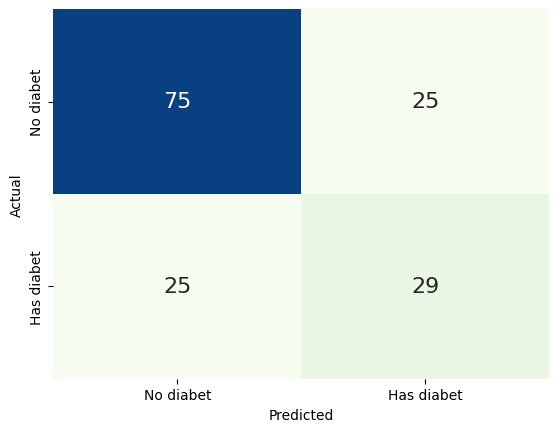

Outcome
1    214
0    211
Name: count, dtype: int64

In [66]:
#now we can also regularize the logit4_ridge

logit4_ridge = make_pipeline(PolynomialFeatures(degree=4, include_bias=False), LogisticRegression(penalty = 'l2', C=0.01,max_iter=100000))

logit4_ridge.fit(X_train, y_train)

scores = cross_val_score(logit4_ridge, X_train, y_train, scoring='recall', cv =5, n_jobs=-1)
print(f'the average recall for 5 iterations of cross validation in training set is: {scores.mean()}')

y_pred4_ridge = logit4_ridge.predict(X_test)

auc = roc_auc_score(y_test, y_pred4_ridge, average='macro')

print(f'roc auc score on test set: {auc}')
print(f'recall after predict: {recall_score(y_test, y_pred4_ridge)}')
matr = confusion_matrix(y_test, y_pred4_ridge, labels=[0, 1])

sns.heatmap(data=matr, cmap='GnBu', fmt='g', annot=True, cbar=False, annot_kws={'size': 16}, xticklabels=['No diabet', 'Has diabet'], yticklabels=['No diabet', 'Has diabet'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

y_train.value_counts()
#not so good